In [2]:
import requests
import os
import pandas as pd
import numpy as np
import argparse
from math import sin, cos, asin, sqrt
import geopy
from geopy import Point
from geopy.distance import distance

In [10]:
#!pip install wget

In [11]:
#! pip install --force-reinstall charset-normalizer==3.1.0 geopy

In [29]:

import wget
data_folder="./mobilityflows"
for i in range(20):
    url = "https://raw.githubusercontent.com/GeoDS/COVID19USFlows-WeeklyFlows-Ct2019/master/weekly_flows/ct2ct/2019_05_06/weekly_ct2ct_2019_05_06_"+str(i)+".csv"
    wget.download(url, out='./mobilityflows')


In [30]:
# Merge all files
import os
import pandas as pd
data_folder="./mobilityflows"
flow_all = []
for file in os.listdir(data_folder):
    if file[-3:] == "csv" and 'weekly_ct2ct' in file:
        print(data_folder+"/"+file)
        flow_df = pd.read_csv(data_folder+"/"+file)
        flow_all.append(flow_df)
result_all = pd.concat([x for x in flow_all])


./mobilityflows/weekly_ct2ct_2019_05_06_8.csv
./mobilityflows/weekly_ct2ct_2019_05_06_9.csv
./mobilityflows/weekly_ct2ct_2021_01_04_15.csv
./mobilityflows/weekly_ct2ct_2019_05_06_11.csv
./mobilityflows/weekly_ct2ct_2021_01_04_6.csv
./mobilityflows/weekly_ct2ct_2021_01_04_7.csv
./mobilityflows/weekly_ct2ct_2019_05_06_10.csv
./mobilityflows/weekly_ct2ct_2021_01_04_14.csv
./mobilityflows/weekly_ct2ct_2021_01_04_16.csv
./mobilityflows/weekly_ct2ct_2019_05_06_12.csv
./mobilityflows/weekly_ct2ct_2021_01_04_5.csv
./mobilityflows/weekly_ct2ct_2021_01_04_4.csv
./mobilityflows/weekly_ct2ct_2019_05_06_13.csv
./mobilityflows/weekly_ct2ct_2021_01_04_17.csv
./mobilityflows/weekly_ct2ct_2021_01_04_13.csv
./mobilityflows/weekly_ct2ct_2019_05_06_17.csv
./mobilityflows/weekly_ct2ct_2021_01_04_0.csv
./mobilityflows/weekly_ct2ct_2021_01_04_1.csv
./mobilityflows/weekly_ct2ct_2019_05_06_16.csv
./mobilityflows/weekly_ct2ct_2021_01_04_12.csv
./mobilityflows/weekly_ct2ct_2021_01_04_10.csv
./mobilityflows/weekl

In [34]:
print( result_all.head() )
print( result_all.shape )

result_all2 = result_all.groupby( ['geoid_o', 'geoid_d' ] ).agg({
                                'lng_o': 'mean', 
                                'lat_o': 'mean', 
                                'lng_d': 'mean', 
                                'lat_d': 'mean', 
                                'visitor_flows': 'mean', 
                                'pop_flows': 'mean'
                                })


       geoid_o      geoid_d   lng_o      lat_o      lng_d      lat_d  \
0  48157672400  48201511600 -95.632  29.671468 -95.377042  29.803012   
1  48157672400  48439110807 -95.632  29.671468 -97.515532  32.726584   
2  48157672400  48157673400 -95.632  29.671468 -95.789046  29.645149   
3  48157672400  48201313700 -95.632  29.671468 -95.366461  29.697499   
4  48157672400  48201522302 -95.632  29.671468 -95.538065  29.789497   

            date_range  visitor_flows  pop_flows  
0  05/06/19 - 05/12/19              6       98.0  
1  05/06/19 - 05/12/19              4       65.0  
2  05/06/19 - 05/12/19             14      228.0  
3  05/06/19 - 05/12/19              4       65.0  
4  05/06/19 - 05/12/19             10      163.0  
(17450165, 9)


(14133128, 6)

In [36]:

result_all2 = result_all.loc[  ( result_all['lng_o'] < -94.15  ) & 
                                            ( result_all['lng_o'] > -96.475 ) &
                                            ( result_all['lat_o'] < 30.658  ) & 
                                            ( result_all['lat_o'] > 28.814  ) &
                                            ( result_all['lng_d'] < -94.15  ) & 
                                            ( result_all['lng_d'] > -96.475 ) &
                                            ( result_all['lat_d'] < 30.658  ) & 
                                            ( result_all['lat_d'] > 28.814  )  ].reset_index()

result_all2.shape

(366536, 10)

In [37]:
print( len( list( pd.unique(  result_all2[['geoid_o', 
                                    'geoid_d']].values.ravel('K')) ) ) )


1167


(33084,)


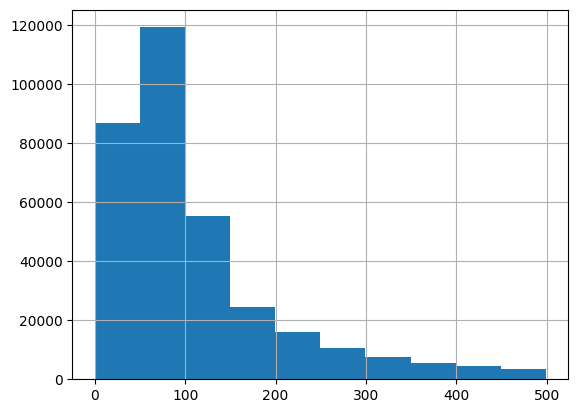

In [43]:
result_all2.pop_flows.quantile( 0.8 )

result_all2.pop_flows[result_all2.pop_flows < 500 ].hist()

print( result_all2.pop_flows[result_all2.pop_flows > 500 ].shape )

In [ ]:

result_all2.to_csv("weekly_ct2ct_2021_01_04.csv", index=False)



In [5]:

result_all2 = pd.read_csv( "weekly_ct2ct_2021_01_04.csv" )


print( result_all2.shape )
result_all2.head()

result_all2['geoid_o'] = result_all2['geoid_o'].apply(int).apply(str)
result_all2['geoid_d'] = result_all2['geoid_d'].apply(int).apply(str)

(157534, 10)


In [6]:
pth_f = r"../inputs/travel/daily_travel_Hou_Galv_updated.csv" 
travel_daily_dfx  = pd.read_csv( pth_f )

travel_daily_dfx['geoid_o'] = travel_daily_dfx['geoid_o'].apply(int).apply(str)
travel_daily_dfx['geoid_d'] = travel_daily_dfx['geoid_d'].apply(int).apply(str)

In [7]:
print( travel_daily_dfx.columns )


Index(['geoid_o', 'geoid_d', 'lng_o', 'lat_o', 'lng_d', 'lat_d',
       'visitor_flows', 'pop_flows', 'route_leng', 'route_time'],
      dtype='object')


In [19]:

travel_daily_dfx2 = travel_daily_dfx[ ['geoid_o', 'geoid_d', 'route_leng', 'route_time'] ]



In [24]:
joined_results = pd.merge(result_all2, travel_daily_dfx2, 
                        left_on = ['geoid_o', 'geoid_d'],
                        right_on = ['geoid_o', 'geoid_d'], how="left" )
print( joined_results.shape )
print( joined_results['route_time'].isna().sum() )


(157534, 12)
101409


In [25]:
joined_results.to_csv( r"../inputs/travel/joined_weekly_mobility.csv", index=False ) 

In [3]:
pth_f = r"../inputs/travel/joined_weekly_mobility.csv"
weekly_mobility_df  = pd.read_csv( pth_f )

In [4]:
print( weekly_mobility_df.head() )

   index      geoid_o      geoid_d      lng_o      lat_o      lng_d  \
0  65966  48201322100  48201980000 -95.210421  29.690043 -95.277263   
1  65967  48201322100  48201314300 -95.210421  29.690043 -95.417726   
2  65968  48201322100  48201313100 -95.210421  29.690043 -95.389865   
3  65969  48201322100  48201412200 -95.210421  29.690043 -95.411071   
4  65970  48201322100  48201343700 -95.210421  29.690043 -95.060686   

       lat_d           date_range  visitor_flows  pop_flows  route_leng  \
0  29.646153  01/04/21 - 01/10/21              8      209.0         NaN   
1  29.683784  01/04/21 - 01/10/21              4      104.0         NaN   
2  29.710823  01/04/21 - 01/10/21              4      104.0     24797.0   
3  29.706935  01/04/21 - 01/10/21              9      235.0         NaN   
4  29.637819  01/04/21 - 01/10/21              8      209.0         NaN   

   route_time  
0         NaN  
1         NaN  
2      1105.0  
3         NaN  
4         NaN  


In [15]:
weekly_mobility_df['point1'] = weekly_mobility_df.apply(lambda row: Point(latitude=row['lat_d'], longitude=row['lng_d']), axis=1)
weekly_mobility_df['point2'] = weekly_mobility_df.apply(lambda row: Point(latitude=row['lat_o'], longitude=row['lng_o']), axis=1)

weekly_mobility_df['distan'] = weekly_mobility_df.apply(lambda row: distance(row['point1'], row['point2']).km , axis=1)

<Axes: >

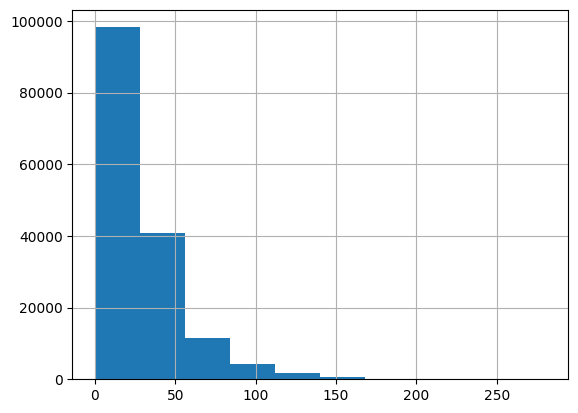

In [16]:
weekly_mobility_df['distan'].hist()

In [17]:
weekly_mobility_df2 = weekly_mobility_df.drop(['point1', 'point2'], axis=1)
print( weekly_mobility_df2.head() )


   index      geoid_o      geoid_d      lng_o      lat_o      lng_d  \
0  65966  48201322100  48201980000 -95.210421  29.690043 -95.277263   
1  65967  48201322100  48201314300 -95.210421  29.690043 -95.417726   
2  65968  48201322100  48201313100 -95.210421  29.690043 -95.389865   
3  65969  48201322100  48201412200 -95.210421  29.690043 -95.411071   
4  65970  48201322100  48201343700 -95.210421  29.690043 -95.060686   

       lat_d           date_range  visitor_flows  pop_flows  route_leng  \
0  29.646153  01/04/21 - 01/10/21              8      209.0         NaN   
1  29.683784  01/04/21 - 01/10/21              4      104.0         NaN   
2  29.710823  01/04/21 - 01/10/21              4      104.0     24797.0   
3  29.706935  01/04/21 - 01/10/21              9      235.0         NaN   
4  29.637819  01/04/21 - 01/10/21              8      209.0         NaN   

   route_time     distan  
0         NaN   8.095591  
1         NaN  20.076545  
2      1105.0  17.517742  
3         NaN 

In [18]:
weekly_mobility_df3 = weekly_mobility_df2.loc[ ~weekly_mobility_df2['route_time'].isna() ]
print( weekly_mobility_df3.shape )


(56125, 13)


52.692348547357646 361.3595316358179 0.8405041765618493 0.0 0.14337726852319815


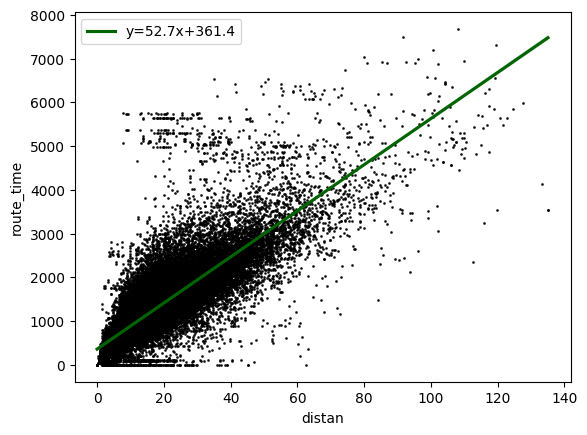

In [46]:
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats


slope, intercept, r_value, p_value, std_err = stats.linregress(weekly_mobility_df3['distan'],
                                                               weekly_mobility_df3['route_time'])

print(slope, intercept, r_value, p_value, std_err)
#ax = sns.regplot(x="total_bill", y="tip", data=tips, color='b', 
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

ax = sns.regplot( x='distan', y='route_time', data = weekly_mobility_df3, 
                  scatter = True, ci = 95, fit_reg = True,
                  scatter_kws={"color": "black", 's': 1}, order=1,
                  line_kws={'color': 'darkgreen',
                            'label': 'y={0:.1f}x+{1:.1f}'.format(slope,intercept)} ) 
ax.legend()


1308.6949453022983 3200.0215180080086 0.8930596955675169 0.0 2.7831740021034608


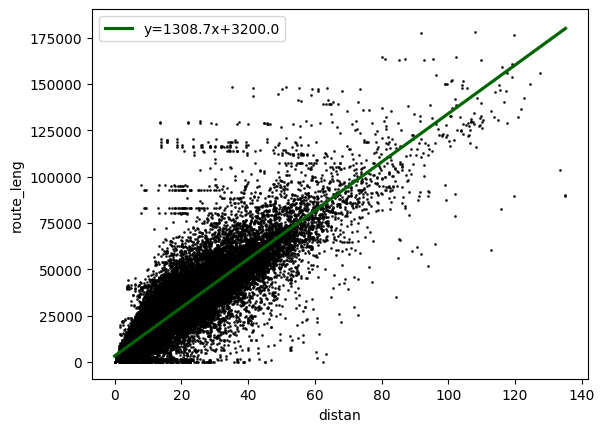

In [47]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(weekly_mobility_df3['distan'],
                                                               weekly_mobility_df3['route_leng'])

print(slope2, intercept2, r_value2, p_value2, std_err2)
ax2 = sns.regplot( x='distan', y='route_leng', data = weekly_mobility_df3, 
                   scatter = True, ci = 95, fit_reg = True,
                   scatter_kws={"color": "black", 's': 1}, order=1,
                   line_kws={'color': 'darkgreen', 
                             'label': 'y={0:.1f}x+{1:.1f}'.format(slope2, intercept2)} ) 
ax2.legend()


In [48]:
weekly_mobility_df2['route_time2'] = 52.7*weekly_mobility_df2['distan'] + 361.4
weekly_mobility_df2['route_leng2'] = 1308.7*weekly_mobility_df2['distan'] + 3200

<Axes: >

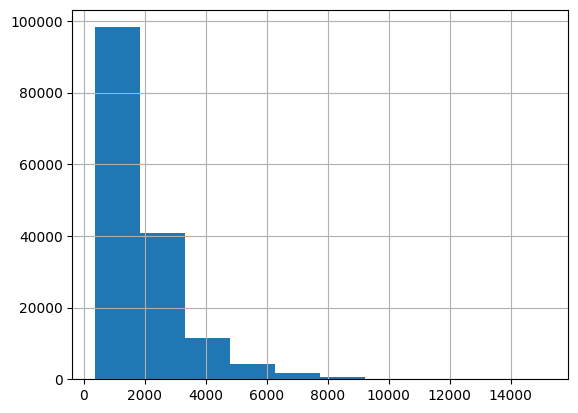

In [49]:
weekly_mobility_df2['route_time2'].hist()

In [51]:
weekly_mobility_df2.to_csv( r"../inputs/travel/joined_weekly_mobility.csv", index=False ) 


In [52]:
census_id_travel = list( pd.unique( 
                         weekly_mobility_df2[['geoid_o', 
                                           'geoid_d']].values.ravel('K')) )

print( len(census_id_travel ) )

1167


In [57]:
print( weekly_mobility_df2.shape )
geo_data    = []
geoid_list  = []
edge_list   = []

for idx, rowi in weekly_mobility_df2.iterrows():
    if rowi['geoid_o'] not in geoid_list:
        datai = { 'geoid': rowi['geoid_o'] ,  'lng': rowi['lng_o'], 'lat': rowi['lat_o'] }
        geo_data.append(datai)
        geoid_list.append( rowi['geoid_o'] )
    if rowi['geoid_d'] not in geoid_list:
        datai = { 'geoid': rowi['geoid_d'] ,  'lng': rowi['lng_d'], 'lat': rowi['lat_d'] }
        geo_data.append(datai)
        geoid_list.append( rowi['geoid_d'] )
    edgei = { "source": rowi['geoid_o'], "target": rowi['geoid_d'], 
              "popflow": rowi['pop_flows'], "visitflow": rowi['visitor_flows'] 
            }
    edge_list.append(edgei)

geo_nodes = pd.DataFrame(geo_data)
edge_data = pd.DataFrame(edge_list)

print( geo_nodes.head() )
print( edge_data.head() )

(157534, 15)
         geoid        lng        lat
0  48201322100 -95.210421  29.690043
1  48201980000 -95.277263  29.646153
2  48201314300 -95.417726  29.683784
3  48201313100 -95.389865  29.710823
4  48201412200 -95.411071  29.706935
        source       target  popflow  visitflow
0  48201322100  48201980000    209.0          8
1  48201322100  48201314300    104.0          4
2  48201322100  48201313100    104.0          4
3  48201322100  48201412200    235.0          9
4  48201322100  48201343700    209.0          8


In [58]:
geo_nodes.to_csv( r"../inputs/travel/census_nodes_loc.csv", index=False ) 
edge_data.to_csv( r"../inputs/travel/census_edges.csv", index=False ) 

In [56]:
rowi

index                         342384
geoid_o                  48201432701
geoid_d                  48201350400
lng_o                     -95.494779
lat_o                      29.727607
lng_d                     -95.210056
lat_d                      29.595817
date_range       01/04/21 - 01/10/21
visitor_flows                      4
pop_flows                      235.0
route_leng                       NaN
route_time                       NaN
distan                     31.196331
route_time2              2005.446664
route_leng2             44026.638876
Name: 157533, dtype: object